In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [4]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [5]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
691,47,male,36.200,1,no,southwest,8068.18500
658,48,female,35.910,1,no,northeast,26392.26029
115,60,male,28.595,0,no,northeast,30259.99556
17,23,male,23.845,0,no,northeast,2395.17155
775,51,male,33.330,3,no,southeast,10560.49170


# **1.Display Top 5 rows of The Dataset**

In [6]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **2. Check Last 5 Rows of the Dataset**

In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **3. Find shape of our Dataset**

In [8]:
data.shape

(1338, 7)

# 4. **Get Information about Dataset**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* ### **The dataset does not contain any missing values.**

# 5. **Check Null Values in The Dataset**

In [10]:
  data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 6. **Get overall statistics about the dataset**

In [11]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# 7. Convert categorical columns to numerical values.

* ###  **`You can use Label Encoding or One-Hot Encoding, but here I am doing it manually.`**

In [12]:
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
# Columns -> sex, smoker, region

data['sex'] = data['sex'].map({'female':0,'male':1})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [14]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


# 8. **Store the feature matrix in X and the target vector in y.**

In [15]:
X = data.drop('charges', axis=1)
y = data['charges']

# **9. Train/Test split**
1. split data into 2 part 
             * training set
             * testing set
2. Train the model on training set
3. Test the model on testing set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* ***As we know, this is a regression problem because the target variable has continuous values, so we will use regression models***

# **10. Import the models**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
    

# **11. Model Training**

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

# **12. Prediction on Test Data**

In [27]:
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)
gr_pred = gr.predict(X_test)

In [28]:
df = pd.DataFrame({'Actual':y_test,'lr_pred':lr_pred,'svm_pred':svm_pred,'rf_pred':rf_pred,'gr_pred':gr_pred})

In [29]:
df

,Actual,lr_pred,svm_pred,rf_pred,gr_pred
764,9095.06825,8924.407244,9548.501784,11350.144941,11001.128629
887,5272.17580,7116.295018,9493.253027,4956.626517,5840.174656
890,29330.98315,36909.013521,9648.297116,28407.858865,28001.980112
1293,9301.89355,9507.874691,9555.223014,10772.230358,9745.291602
259,33750.29180,27013.350008,9421.474560,34596.261010,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.419534,47150.165725,45431.423211
575,12222.89830,11814.555568,9625.047904,12694.990235,12465.025294
535,6067.12675,7638.107736,9504.805678,6325.493058,6974.336525
543,63770.42801,40959.081722,9604.855076,46677.583303,47862.047791


# **13. Comapare Performance Visually**

In [30]:
import matplotlib.pyplot as plt

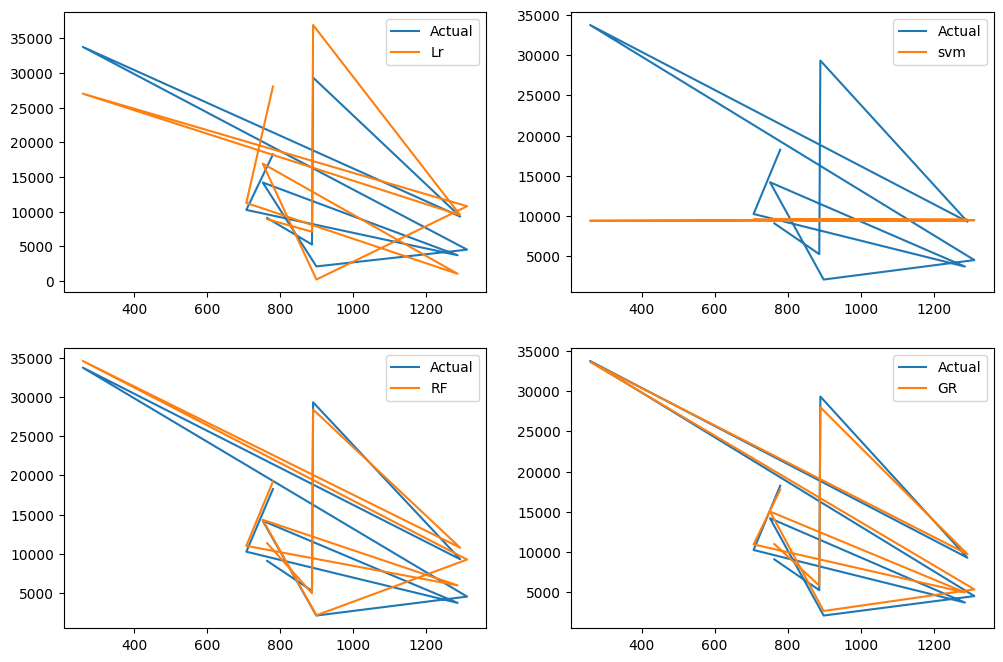

In [45]:
plt.figure(figsize=(12, 8))  # Set figure size first

plt.subplot(221)  # Define the first subplot in a 2x2 grid
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['lr_pred'].iloc[0:11], label='Lr')
plt.legend()


plt.subplot(222)  
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['svm_pred'].iloc[0:11], label='svm')
plt.legend()


plt.subplot(223)  
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['rf_pred'].iloc[0:11], label='RF')
plt.legend()


plt.subplot(224)  
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['gr_pred'].iloc[0:11], label='GR')
plt.legend()


# **14. Evaluating the Algorithm**

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error

In [47]:
lr_score = r2_score(y_test, lr_pred)
svm_score = r2_score(y_test, svm_pred)
rf_score = r2_score(y_test, rf_pred)
gr_score = r2_score(y_test, gr_pred)

In [48]:
print(lr_score, svm_score, rf_score, gr_score)

0.7833463107364539 -0.07230841842488811 0.8637635256800384 0.8779936181637191


In [51]:
lr_score_m = mean_absolute_error(y_test, lr_pred)
svm_score_m = mean_absolute_error(y_test, svm_pred)
rf_score_m = mean_absolute_error(y_test, rf_pred)
gr_score_m = mean_absolute_error(y_test, gr_pred)

In [52]:
print(lr_score_m,svm_score_m,rf_score_m,gr_score_m)

4186.508898366432 8592.79866979489 2501.9867251337064 2447.167158715136


# **15. Predict Charges for New Customer**

In [54]:
data1 = {
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'region':2
}
df_ = pd.DataFrame(data1, index=[0])

In [55]:
df_

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [56]:
new_pred = gr.predict(df_)
new_pred

array([44974.84644584])